<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/0502_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH3. 평가 ##

분류에 사용되는 성능 평가 지표

**분류의 성능 평가 지표**

- 정확도(accuracy)
- 오차행렬(Confusion matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있음.
이 성능 지표들은 이진/멀티 분류 모두에 적용되는 지표이지만, 이진 분류에서 더욱 중요하게 강조하는 지표



### 정확도(Accuracy) ###

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

**정확도 = 예측 결과가 동일한 데이터 건수 / 전체 에측 데이터 개수**

정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는가?
- 타이타닉 예제 수행 결과에서 단지 성별 조건 하나만을 가지고 결정하는 알고리즘도 높은 정확도를 나타내는 상황이 발생

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np

# 아무런 학습도 하지 않고 성별에 따라 생존자를 예측하는 단순한 classifier 생성

class MYDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i] = 0
            else:
                pred[i]=1
        return pred

In [ ]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성을 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

from sklearn import preprocessing
# 레이블 인코딩을 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder() # LabelEncoder 클래스 선언
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수를 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
# 타이타닉 생존자 예측

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv("c:/Temp/train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size=0.2, random_state=0)

In [ ]:
myclf = MYDummyClassifier()
myclf.fit(X_train,y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


단순한 알고리즘으로 예측을 하더라도 구성에 따라 정확도 결과는 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 신중해아함

특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님

MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 후에 정확도 지표 적용시 어떤 문제가 발생할 수 있는 살펴봄
- MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit을 예측하는 데 사용됨
- 사이킷런은 load_digits() API를 통해 MNIST 데이터 세트를 제공
- 레이블 값이 7인 것만 True, 나머지 값을 모두 False로 변환해 이진 분류로 즉, 전체 데이터의 10%만 True, 나머지는 False인 불균형한 데이터 세트로 변환함
- 이렇게 불균형한 데이터 세트에 모든 데이터를 False로 예측하는 Classifier을 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환
# 7번이 아니면 False이고 0으로 변환
y = (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state=11)

불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFakeClassifier를 이용해 예측과 평가를 수행

In [ ]:
# 불균형한 레이블 데이터 분포 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


정확도가 가지는 분류 평가 지표로서 한계점을 극복하기 위해서 여러 가지 분류 지표와 함께 적용해야 함

### 오차 행렬 ###

학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표, 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표

**오차행렬** 

- 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냄
- 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 positive로 분류하고, 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류 (TN, FP, FN, TP)
- TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있음
- 사이킷런은 오차행렬을 구하기 위해 confusion_matrix() API를 제공


**TN/FP/FN/TP**

- TN은 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
- TN은 예측값을 Positive 값 1로 예측했고 실제 값 역시 Positive 값 1

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- 출력된 오차 행렬은 ndarray 형태
- TP, TN, FP, TN 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도, 정밀도, 재현율 값을 알 수 있음

**정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수  = (TN+TP) / (TN + FP + FN + TP)**

- 일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결과값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우에 Negative로 0 값을 부여
- 불균형한 이진 데이터 세트에서는 Postive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생

### 정밀도와 재현율 ###

정밀도와 재현율은 postive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

**정밀도 = TP / (FP + TP)**

- 예측을 postive로 한 대상 중에 예측과 실제 값이 Postitive로 일치한 데이터의 비율
- Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불림
- 사이킷런은 precision_score() API 제공

**재현율 = TP / (FN + TP)**

- 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함
- 민감도 또는 TPR이라고도 불림 
- 사이킷런은 recall_score() API 제공


정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있음


**재현율이 중요 지표인 경우**

- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 보험사기, 금융사기 적발 모델 등


**정밀도가 중요 지표인 경우**

- 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 스팸메일 여부 판단하는 모델 등


재현율과 정밀도는 모두 **TP를 높이는 데** 동일하게 초점을 맞추지만, 재현율은 **FN**를 낮추는 데, 정밀도는 **FP**를 낮추는데 초점을 맞춤 -> **서로 보완적인 지표**로 분류의 성능을 평가하는데 적용됨 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}".format(accuracy, precision, recall))

In [ ]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행

from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv("c:/Temp/train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도/재현율 트레이드 오프 ###

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음, 하지만 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움

일반적으로 이진 분류에서는 임곗값을 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정

사이킷런은 개별 데이터별 예측 확률을 반환하는 메서드인 predict_proba()를 제공

- 학습이 완료된 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
- predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과

**입력 파라미터**

- predict() 메서드와 동일하게 보통 테스트 피처 데이터 세트를 입력

**반환 값**

- 개별 클래스와 예측 확률을 ndarray m x n 형태로 반환
- 입력 테스트 데이터 세트의 표본 개수가 100개이고 예측 클래스 값 유형이 2개라면 반환 값은 100 x 2 ndarray
- 각 열은 개별 클래스의 예측 확률, 이진 분류에서 첫번째 칼럼은 0 Negative의 확률, 두번째 칼럼은 1 Positive의 확률

In [ ]:
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)
print("pred_proba()의 결과 shape: {0}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출\n", pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n", pred_proba_result[:3])

pred_proba()의 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.46191331 0.53808669]
 [0.87867473 0.12132527]
 [0.8771619  0.1228381 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46191331 0.53808669 1.        ]
 [0.87867473 0.12132527 0.        ]
 [0.8771619  0.1228381  0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번째 칼럼과 두번째 칼럼 값을 더하면 1
- 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측
- predict()는 predict_proba() 호출 결과 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API

Binarizer 클래스의 사용법

- fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환

In [ ]:
from sklearn.preprocessing import Binarizer

X= [[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
# Binarizer의 threshold 설정값. 분류 결정 임곗값
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉, positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [ ]:
# Binarizer의 threshold 설정값을 0.4로 설정, 즉, 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


임곗값을 낮추니 재현율 값이 올라가고 정밀도 떨어짐
- 이유 : 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 됨, 임계값을 낮출수록 True 값이 많아지게 됨, Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐

In [ ]:
#임겟값을 0.4에서부터 0.6까지 0.05씩 증가시키며 조사
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.44, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #threshold list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.44
오차 행렬
[[101  17]
 [ 11  50]]
정확도: 0.8436, 정밀도: 0.7463, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


임곗값이 0.45일 경우에 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐음 -> 가장 적당


**precision_recall_curve() API**

**입력 파라미터**

- y_true : 실제 클래스값 배열 (배열 크기=[데이터 건수])
- probas_pred : Positive 칼럼의 예측 확률 배열 (배열 크기=[데이터 건수])

**반환 값**

- 정밀도 : 임계값별 정밀도 값을 배열로 반환
- 재현율 : 임계값별 재현율 값을 배열로 반환

In [ ]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 stepdmfh cncnf
thr_index = np.arange(0,thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있음

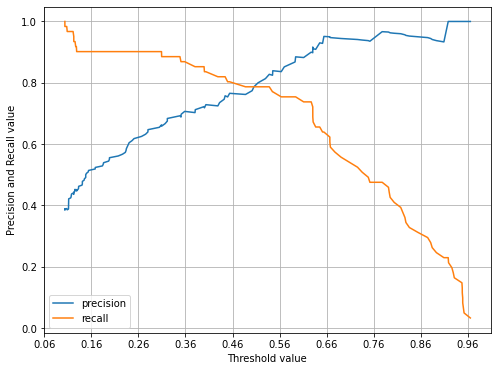

In [ ]:
# 정밀도와 재현율 곡선을 시각화 

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 임곗값이 낮을수록 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐
- 임계값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아짐

## 정밀도와 재현율의 맹점 ##

**정밀도가 100%가 되는 방법**

 - 확실한 기준이 되는 경우만 Positive로 예측하고 나머지 모두 Negative로 예측
 
**재현율이 100%가 되는 방법**

- 모두 Positive로 예측

어느 한쪽만 참조하면 극단적인 수치 조작이 가능함 -> 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주

정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함

### F1 스코어 ###

정밀도와 재현율을 결합한 지표, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐!

**F1 = 2 / (1/recall + 1/precision) = 2 * (precision * recall) / (precision + recall)**

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [ ]:
def get_clf_eval(y_test, pred): 
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  #F1 스코어 추가
  f1 = f1_score(y_test, pred)

  print('오차행렬')
  print(confusion)

  #f1 score print 추가  
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, 
                                                                         recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율:0.8361, F1 : 0.7727
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율:0.8033, F1 : 0.7840
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율:0.7869, F1 : 0.7805
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율:0.7541, F1 : 0.7931
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율:0.7377, F1 : 0.8036


F1 스코어는 임계값이 0.6일 때 가장 좋은 값을 보여주나 재현율이 크게 감소하고 있음

### ROC 곡선과 AUC ###

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

**ROC 곡선**
 
- 수신자 판단 곡선
- FPR (False Positive Rate)이 변할 때 TPR(True Postive Rate)이 어떻게 변하는지를 나타내는 곡선
- FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남
- TPR은 재현율, 민감도 : 실제값 Positive가 정확히 예측돼야 하는 수준을 나타냄
- TNR은 특이성 : 실제값 Negative가 정확히 예측돼야 하는 수준

**FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성**

- 가운데 직선은 ROC 곡선의 최저 값
- 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것
- FPR을 분류 결정 임곗값을 변경하여 0부터 1까지 변경하면서 TPR을 구함 
- FPR을 0으로 만드려면 임곗값을 1로 지정하면 됨 (Positive 예측 기준이 매우 높기 떼문에 분류기가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문)
- FPR을 1으로 만드려면 임곗값을 0으로 지정하여 TN을 0으로 만들면 됨 (분류기의 Positive 확률 기준이 너무 낮아서 다 Positive로 예측)
- 사이킷런은 roc_curve() API 제공

**입력 파라미터**

- y_true : 실제 클래스 값 (array shape = [데이터 건수])
- y_score : predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. array.shape=[n_samples]

**반환 값**

- fpr : fpr 값을 array로 반환
- tpr : tpr 값을 array로 반환
- thresholds : threshold 값 array

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 Step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print("샘플 추출을 위한 임계값 배열의 index 10개:", thr_index)
print("샘플용 10개의 임계값:", np.round(thresholds[thr_index], 2))

# 5 Step 단위로 추출된 임계값에 따른 FPR, TPR 값
print("샘플 임계값별 FPR: ", np.round(fprs[thr_index], 3))
print("샘플 임계값별 TPR: ", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐, FPR이 조금씩 커질 때 TPR은 가파르게 커짐을 알 수 있음

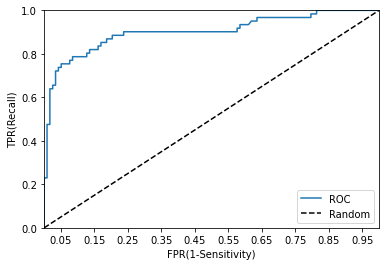

In [ ]:
def roc_curve_plot(Y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label="Random")

    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("FPR(1-Sensitivity)")
    plt.ylabel("TPR(Recall)")
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

**AUC 값**

- 분류 성능 지표로 사용됨 (ROC 곡선 면적에 기반)
- ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치
- 가운데 직선에 멀어질수록 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 됨
- 보통의 분류는 0.5이상의 AUC 값 가짐

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))